# Challenge 1: Weather Patterns and Agricultural Questions
## By: Kaushal Bhingaradia
## Date: 2025-11-23

---

## Executive Summary

This analysis explores how weather patterns influence the types of agricultural questions farmers ask on Producers Direct platform. Using advanced data science techniques including time series analysis, and natural language processing, we uncover actionable insights about weather-driven agricultural concerns.

**Key Objectives:**
1. Identify temporal patterns in question volume and topics
2. Analyze correlation between weather seasons and question categories  
3. Provide actionable insights for proactive farmer support

## 1. Import Libraries and Setup

In [1]:
# Core data manipulation
import numpy as np
import pandas as pd
from datetime import datetime, timedelta

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# NLP and Text Analysis
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Utilities
import re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Data Loading and Initial Exploration

In [3]:
print("Loading Data.... (This may take a while)")
data = pd.read_csv('~/Downloads/weather.csv')
print('\nDone Loading!')
print(f"\nDataset Shape: {data.shape[0]:,} rows × {data.shape[1]} columns")
data.head()

Loading Data.... (This may take a while)

Done Loading!

Dataset Shape: 20,304,843 rows × 24 columns


,question_id,question_user_id,question_language,question_content,question_topic,question_sent,response_id,response_user_id,response_language,response_content,response_topic,response_sent,question_user_type,question_user_status,question_user_country_code,question_user_gender,question_user_dob,question_user_created_at,response_user_type,response_user_status,response_user_country_code,response_user_gender,response_user_dob,response_user_created_at
0,3849056,519124,nyn,E ABA WEFARM OFFICES ZABO NIZISHANGWA NKAHI?,NaN,2017-11-22 12:25:03+00,20691011,200868,nyn,E!23 Omubazi Ni Dudu Cipa',NaN,2019-01-24 17:54:06.216221+00,farmer,live,ug,NaN,NaN,2017-11-18 13:09:11+00,farmer,live,ug,NaN,NaN,2017-05-09 09:19:33+00
1,3849061,521327,eng,Q this goes to wefarm. is it possible to get f...,NaN,2017-11-22 12:25:05+00,4334249,526113,eng,Q1 which stage is marleks last vaccinated,NaN,2018-01-04 08:57:28+00,farmer,live,ug,NaN,NaN,2017-11-20 11:55:48+00,farmer,zombie,ug,NaN,NaN,2017-11-22 10:13:03+00
2,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,tomato,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
3,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cattle,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,cattle,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00
4,3849077,307821,nyn,E ENTE YANJE EZAIRE ENYENA YASHOBERA. \nOBWIRE...,cat,2017-11-22 12:25:08+00,3849291,296187,nyn,Muhanguzi.Benon kuruga masha isingiro ente yaw...,tomato,2017-11-22 12:35:26+00,farmer,zombie,ug,NaN,NaN,2017-08-22 14:51:07+00,farmer,zombie,ug,NaN,NaN,2017-08-12 09:30:33+00


## 3. Data Quality Assessment

In [4]:
print("="*70)
print("DATA QUALITY REPORT")
print("="*70)

print("\n📊 Dataset Dimensions:")
print(f"   Rows: {data.shape[0]:,}")
print(f"   Columns: {data.shape[1]}")

print("\n📋 Column Data Types:")
print(data.dtypes)

print("\n❓ Missing Values Analysis:")
missing_data = data.isna().sum()
missing_pct = (missing_data / len(data) * 100).round(2)
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_pct
}).sort_values('Missing Count', ascending=False)
print(missing_df[missing_df['Missing Count'] > 0])

print("\n🔢 Unique Values per Column:")
print(data.nunique().sort_values(ascending=False))

print("\n📈 Numerical Column Statistics:")
display(data.describe())

DATA QUALITY REPORT

📊 Dataset Dimensions:
   Rows: 20,304,843
   Columns: 24

📋 Column Data Types:
question_id                    int64
question_user_id               int64
question_language             object
question_content              object
question_topic                object
question_sent                 object
response_id                    int64
response_user_id               int64
response_language             object
response_content              object
response_topic                object
response_sent                 object
question_user_type            object
question_user_status          object
question_user_country_code    object
question_user_gender          object
question_user_dob             object
question_user_created_at      object
response_user_type            object
response_user_status          object
response_user_country_code    object
response_user_gender          object
response_user_dob             object
response_user_created_at      object
dtype: objec

,question_id,question_user_id,response_id,response_user_id
count,2.030484e+07,2.030484e+07,2.030484e+07,2.030484e+07
mean,3.063880e+07,1.833289e+06,3.086022e+07,1.629548e+06
std,1.635694e+07,1.058127e+06,1.636177e+07,1.047366e+06
min,3.849056e+06,7.000000e+00,3.849209e+06,7.000000e+00
25%,1.612385e+07,9.801100e+05,1.634213e+07,7.970650e+05
50%,2.919434e+07,1.753870e+06,2.948176e+07,1.383485e+06
75%,4.552916e+07,2.805610e+06,4.579527e+07,2.468823e+06
max,5.926151e+07,3.833007e+06,5.926235e+07,3.832167e+06


## 4. Data Preprocessing and Feature Engineering

We'll create temporal features and categorize questions by weather-sensitive topics.

In [5]:
# Convert timestamps to datetime
data['question_sent'] = pd.to_datetime(data['question_sent'], format='mixed', utc=True)
data['response_sent'] = pd.to_datetime(data['response_sent'], format='mixed', utc=True)

# Extract temporal features
data['year'] = data['question_sent'].dt.year
data['month'] = data['question_sent'].dt.month
data['month_name'] = data['question_sent'].dt.month_name()
data['day_of_week'] = data['question_sent'].dt.day_name()
data['day_of_year'] = data['question_sent'].dt.dayofyear
data['week_of_year'] = data['question_sent'].dt.isocalendar().week
data['quarter'] = data['question_sent'].dt.quarter

# Define seasons for East Africa (based on rainfall patterns)
def get_season(month):
    if month in [3, 4, 5]:  # Long rains
        return 'Long Rains'
    elif month in [10, 11, 12]:  # Short rains
        return 'Short Rains'
    elif month in [6, 7, 8, 9]:  # Cool/Dry season
        return 'Dry Season'
    else:  # Hot/Dry season
        return 'Hot Dry Season'

data['season'] = data['month'].apply(get_season)

print("✓ Temporal features created")
print(f"\n📅 Date Range: {data['question_sent'].min()} to {data['question_sent'].max()}")
print(f"📆 Total Days Covered: {(data['question_sent'].max() - data['question_sent'].min()).days}")

# Display feature samples
print("\n🎯 Sample of Engineered Features:")
display(data[['question_sent', 'year', 'month', 'month_name', 'season', 'day_of_week']].head(10))

✓ Temporal features created

📅 Date Range: 2017-11-22 12:25:03+00:00 to 2022-06-21 14:31:25.474665+00:00
📆 Total Days Covered: 1672

🎯 Sample of Engineered Features:


,question_sent,year,month,month_name,season,day_of_week
0,2017-11-22 12:25:03+00:00,2017,11,November,Short Rains,Wednesday
1,2017-11-22 12:25:05+00:00,2017,11,November,Short Rains,Wednesday
2,2017-11-22 12:25:08+00:00,2017,11,November,Short Rains,Wednesday
3,2017-11-22 12:25:08+00:00,2017,11,November,Short Rains,Wednesday
4,2017-11-22 12:25:08+00:00,2017,11,November,Short Rains,Wednesday
5,2017-11-22 12:25:08+00:00,2017,11,November,Short Rains,Wednesday
6,2017-11-22 12:25:09+00:00,2017,11,November,Short Rains,Wednesday
7,2017-11-22 12:25:10+00:00,2017,11,November,Short Rains,Wednesday
8,2017-11-22 12:25:10+00:00,2017,11,November,Short Rains,Wednesday
9,2017-11-22 12:25:10+00:00,2017,11,November,Short Rains,Wednesday


### 4.1 Weather-Sensitive Topic Detection

Create keyword-based categorization for weather-sensitive agricultural topics.

In [6]:
# Define weather-sensitive keywords
weather_keywords = {
    'pest': ['pest', 'insect', 'worm', 'aphid', 'locust', 'bug', 'mite', 'beetle', 'caterpillar'],
    'disease': ['disease', 'fungus', 'rot', 'blight', 'wilt', 'mold', 'virus', 'bacteria'],
    'drought': ['drought', 'dry', 'water', 'irrigation', 'rain', 'moisture', 'thirst'],
    'planting': ['plant', 'seed', 'sow', 'germination', 'nursery', 'transplant'],
    'harvesting': ['harvest', 'yield', 'produce', 'crop', 'mature', 'ready'],
    'soil': ['soil', 'fertilizer', 'nutrient', 'compost', 'manure', 'nitrogen', 'ph'],
    'weather_damage': ['flood', 'storm', 'hail', 'wind', 'damage', 'destroy']
}

# Function to categorize questions
def categorize_question(text):
    if pd.isna(text):
        return 'other'
    
    text_lower = str(text).lower()
    categories = []
    
    for category, keywords in weather_keywords.items():
        if any(keyword in text_lower for keyword in keywords):
            categories.append(category)
    
    return categories[0] if categories else 'other'

# Apply categorization
data['weather_category'] = data['question_content'].apply(categorize_question)

print("✓ Question categorization complete")
print("\n📊 Distribution of Weather-Sensitive Categories:")
category_dist = data['weather_category'].value_counts()
print(category_dist)

✓ Question categorization complete

📊 Distribution of Weather-Sensitive Categories:
weather_category
other             14615982
planting           2537891
harvesting          898075
drought             674157
disease             672664
pest                510161
soil                370915
weather_damage       24998
Name: count, dtype: int64


The visualizations for: Distribution of Weather-Sensitive Categories

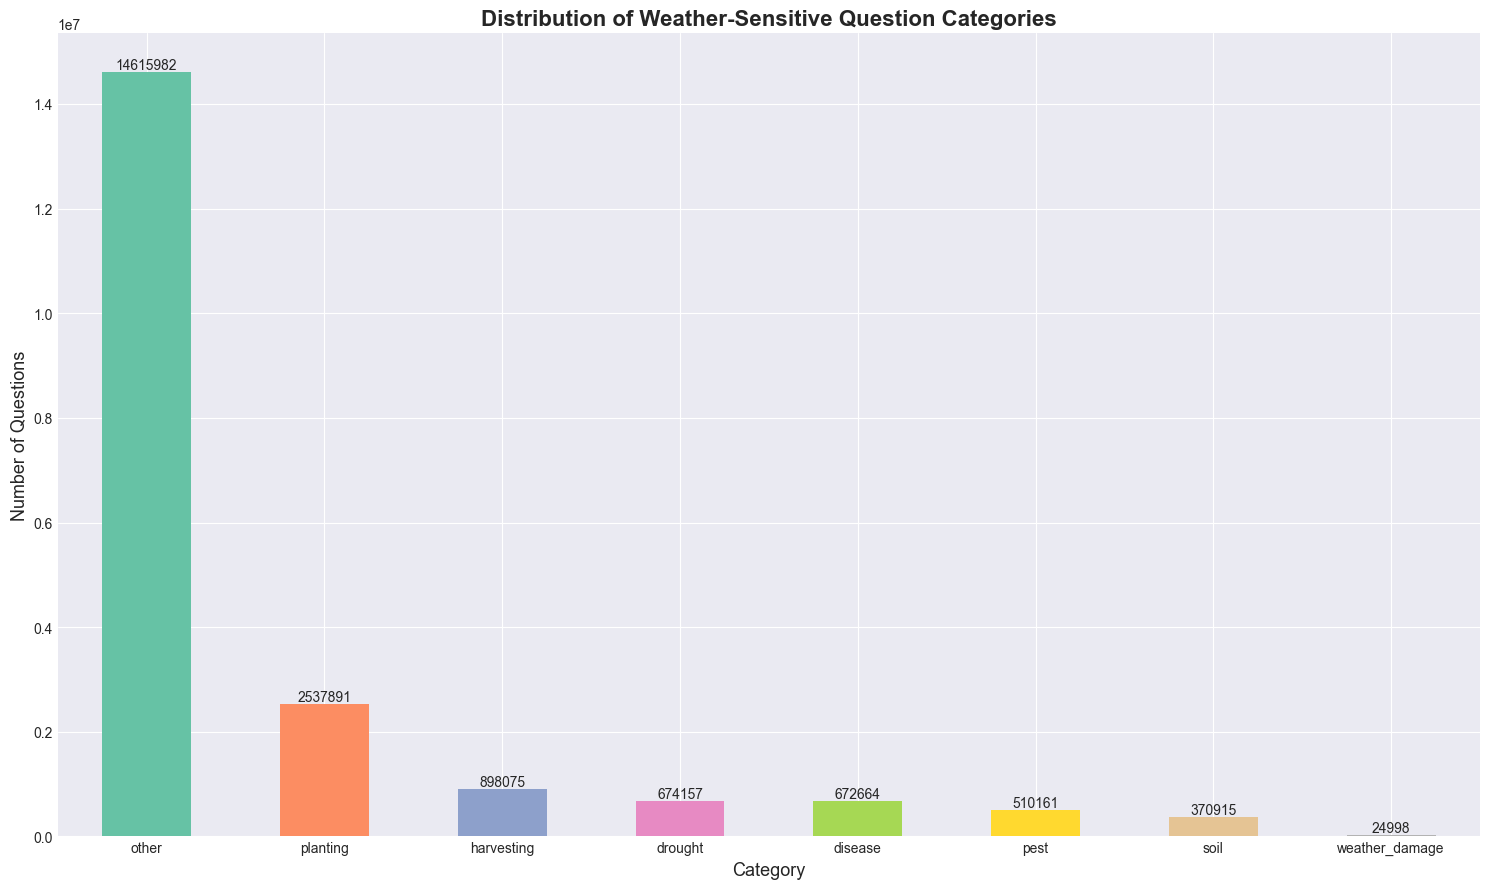

In [7]:
# Visualize category distribution
fig, ax = plt.subplots(figsize=(15, 9))
category_dist.plot(kind='bar', ax=ax, color=sns.color_palette('Set2', len(category_dist)))
ax.set_title('Distribution of Weather-Sensitive Question Categories', fontsize=16, fontweight='bold')
ax.set_xlabel('Category', fontsize=13)
ax.set_ylabel('Number of Questions', fontsize=13)
ax.tick_params(axis='x', rotation=0, labelsize=10)
# add a label on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.tight_layout()
plt.show()

## 5. Exploratory Data Analysis

### 5.1 Temporal Patterns in Question Volume

In [11]:
# --- Ensure datetime ---
data['question_sent'] = pd.to_datetime(data['question_sent'])

# --- Aggregate by date ---
daily_questions = (
    data.groupby(data['question_sent'].dt.date)
    .size()
    .reset_index(name='question_count')
)
daily_questions['date'] = pd.to_datetime(daily_questions['question_sent'])

# --- Monthly order ---
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# --- Day order ---
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# --- Season order ---
season_order = ['Hot Dry Season', 'Long Rains', 'Dry Season', 'Short Rains']

# --- Monthly aggregation ---
monthly_avg = (
    data.groupby('month_name')['question_id']
    .count()
    .reindex(month_order)
)

# --- Seasonal aggregation ---
season_counts = (
    data['season']
    .value_counts()
    .reindex(season_order)
)

# --- Day of week aggregation ---
day_counts = (
    data['day_of_week']
    .value_counts()
    .reindex(day_order)
)

Visualization and key insights output for temporal patterns in question volumes.

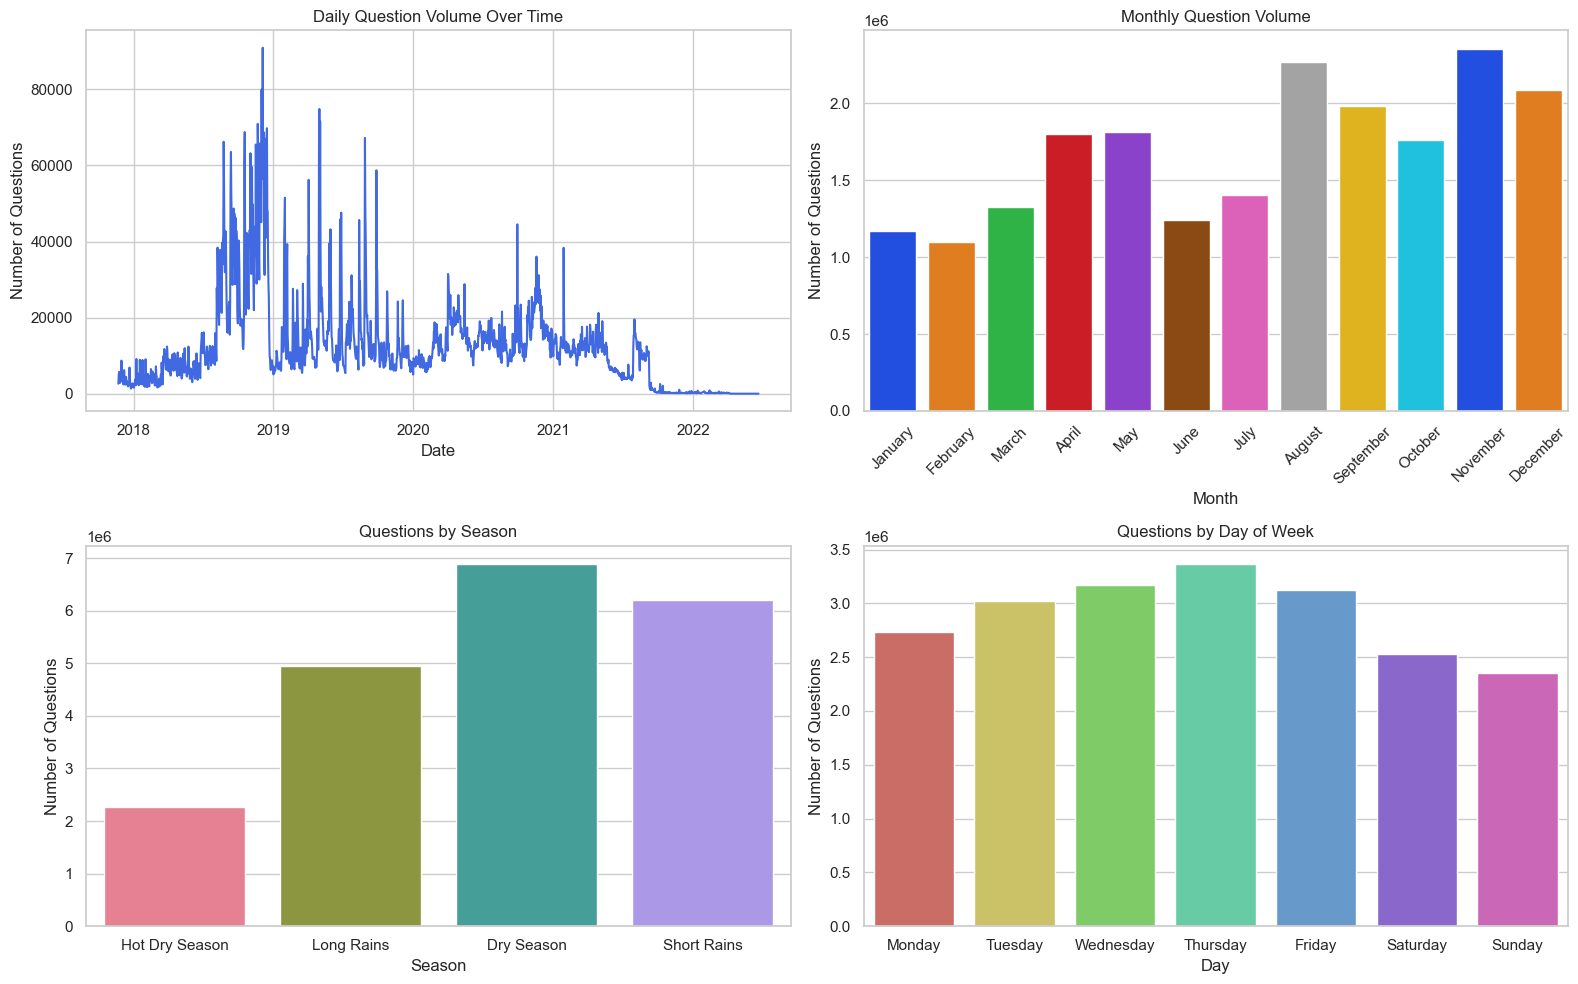


📈 Key Temporal Insights:
   Peak Question Month: November (2,355,975 questions)
   Lowest Question Month: February (1,099,469 questions)
   Most Active Season: Dry Season (6,890,819 questions)
   Most Active Day: Thursday (3,367,148 questions)


In [38]:
# =============================================================
#                 VISUALIZATION WITH SEABORN
# =============================================================

sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# --- 1. Daily Time Series ---
sns.lineplot(
    ax=axes[0, 0],
    data=daily_questions,
    x='date',
    y='question_count',
    color='royalblue',
)
axes[0, 0].set_title("Daily Question Volume Over Time")
axes[0, 0].set_xlabel("Date")
axes[0, 0].set_ylabel("Number of Questions")

# --- 2. Monthly Average ---
sns.barplot(
    ax=axes[0, 1],
    x=monthly_avg.index,
    y=monthly_avg.values,
    palette='bright'
)
axes[0, 1].set_title("Monthly Question Volume")
axes[0, 1].set_xlabel("Month")
axes[0, 1].set_ylabel("Number of Questions")
axes[0, 1].tick_params(axis='x', rotation=45)

# --- 3. Questions by Season ---
sns.barplot(
    ax=axes[1, 0],
    x=season_counts.index,
    y=season_counts.values,
    palette='husl'
)
axes[1, 0].set_title("Questions by Season")
axes[1, 0].set_xlabel("Season")
axes[1, 0].set_ylabel("Number of Questions")
axes[1, 0].tick_params(axis='x', rotation=0)

# --- 4. Questions by Day of Week ---
sns.barplot(
    ax=axes[1, 1],
    x=day_counts.index,
    y=day_counts.values,
    palette='hls'
)
axes[1, 1].set_title("Questions by Day of Week")
axes[1, 1].set_xlabel("Day")
axes[1, 1].set_ylabel("Number of Questions")
axes[1, 1].tick_params(axis='x', rotation=0)

# --- Final layout ---
plt.tight_layout()
plt.show()

# =============================================================
#                  KEY INSIGHTS PRINTED
# =============================================================

print("\n📈 Key Temporal Insights:")
print(f"   Peak Question Month: {monthly_avg.idxmax()} ({monthly_avg.max():,} questions)")
print(f"   Lowest Question Month: {monthly_avg.idxmin()} ({monthly_avg.min():,} questions)")
print(f"   Most Active Season: {season_counts.idxmax()} ({season_counts.max():,} questions)")
print(f"   Most Active Day: {day_counts.idxmax()} ({day_counts.max():,} questions)")

### 5.2 Weather Category Analysis by Season

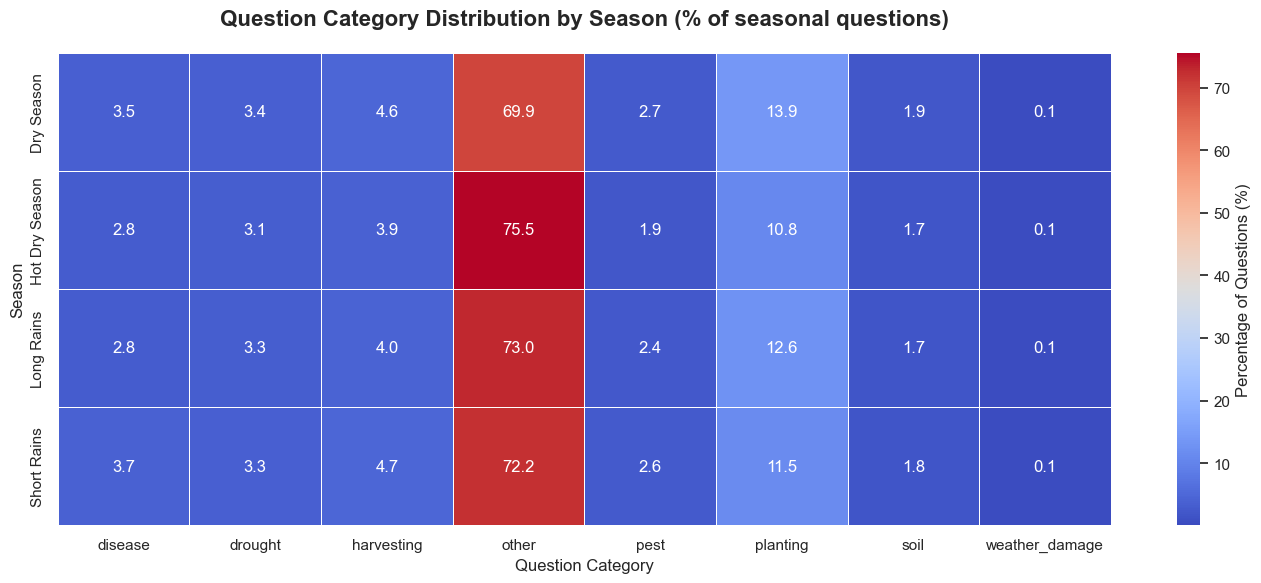


🌦️ Seasonal Category Insights:
   Dry Season: Top category is 'other' (69.9% of questions)
   Hot Dry Season: Top category is 'other' (75.5% of questions)
   Long Rains: Top category is 'other' (73.0% of questions)
   Short Rains: Top category is 'other' (72.2% of questions)


In [41]:
# Create cross-tabulation
season_category = pd.crosstab(data['season'], data['weather_category'], normalize='index') * 100

# Heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(season_category, annot=True, fmt='.1f', cmap='coolwarm', 
            cbar_kws={'label': 'Percentage of Questions (%)'}, linewidths=0.5)
plt.title('Question Category Distribution by Season (% of seasonal questions)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Question Category', fontsize=12)
plt.ylabel('Season', fontsize=12)
plt.tight_layout()
plt.show()

# Statistical insights
print("\n🌦️ Seasonal Category Insights:")
for season in season_category.index:
    top_cat = season_category.loc[season].idxmax()
    top_pct = season_category.loc[season].max()
    print(f"   {season}: Top category is '{top_cat}' ({top_pct:.1f}% of questions)")

### 5.3 Time Series Decomposition

Decompose the time series to identify trend, seasonality, and residuals.

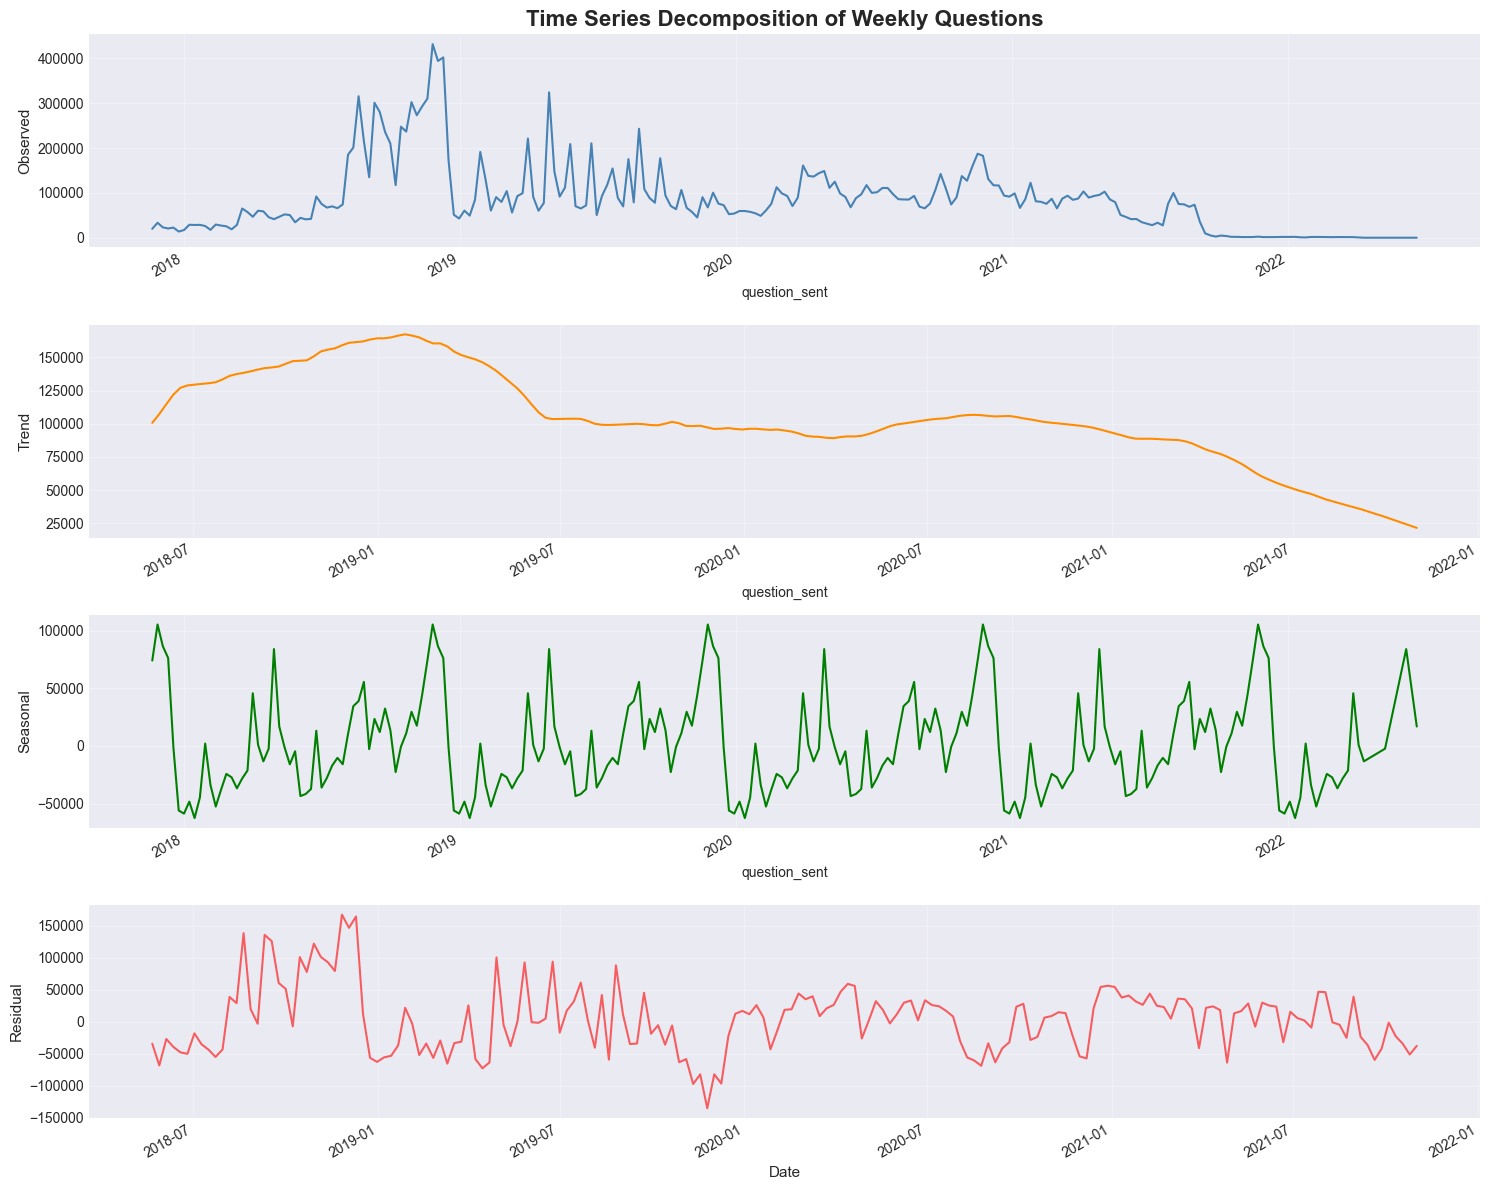


📊 Decomposition Insights:
   Trend shows: Decreasing pattern
   Seasonal variation range: 105370 - -62587 questions


In [ ]:
# Prepare weekly aggregated data for decomposition
weekly_data = data.groupby(data['question_sent'].dt.to_period('W')).size()
weekly_data.index = weekly_data.index.to_timestamp()

# Perform decomposition
decomposition = seasonal_decompose(weekly_data, model='additive', period=52)

# Plot
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Observed
decomposition.observed.plot(ax=axes[0], color='steelblue')
axes[0].set_ylabel('Observed', fontsize=11)
axes[0].set_title('Time Series Decomposition of Weekly Questions', fontsize=16, fontweight='bold')
axes[0].grid(alpha=0.3)

# Trend
decomposition.trend.plot(ax=axes[1], color='darkorange')
axes[1].set_ylabel('Trend', fontsize=11)
axes[1].grid(alpha=0.3)

# Seasonal
decomposition.seasonal.plot(ax=axes[2], color='green')
axes[2].set_ylabel('Seasonal', fontsize=11)
axes[2].grid(alpha=0.3)

# Residual
decomposition.resid.plot(ax=axes[3], color='red', alpha=0.6)
axes[3].set_ylabel('Residual', fontsize=11)
axes[3].set_xlabel('Date', fontsize=11)
axes[3].grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Decomposition Insights:")
print(f"   Trend shows: {'Increasing' if decomposition.trend.dropna().iloc[-1] > decomposition.trend.dropna().iloc[0] else 'Decreasing'} pattern")
print(f"   Seasonal variation range: {decomposition.seasonal.max():.0f} - {decomposition.seasonal.min():.0f} questions")

### 5.4 Advanced Topic Modeling with LDA

Extract latent topics from questions to understand thematic patterns.

Creating document-term matrix...
Training LDA model...


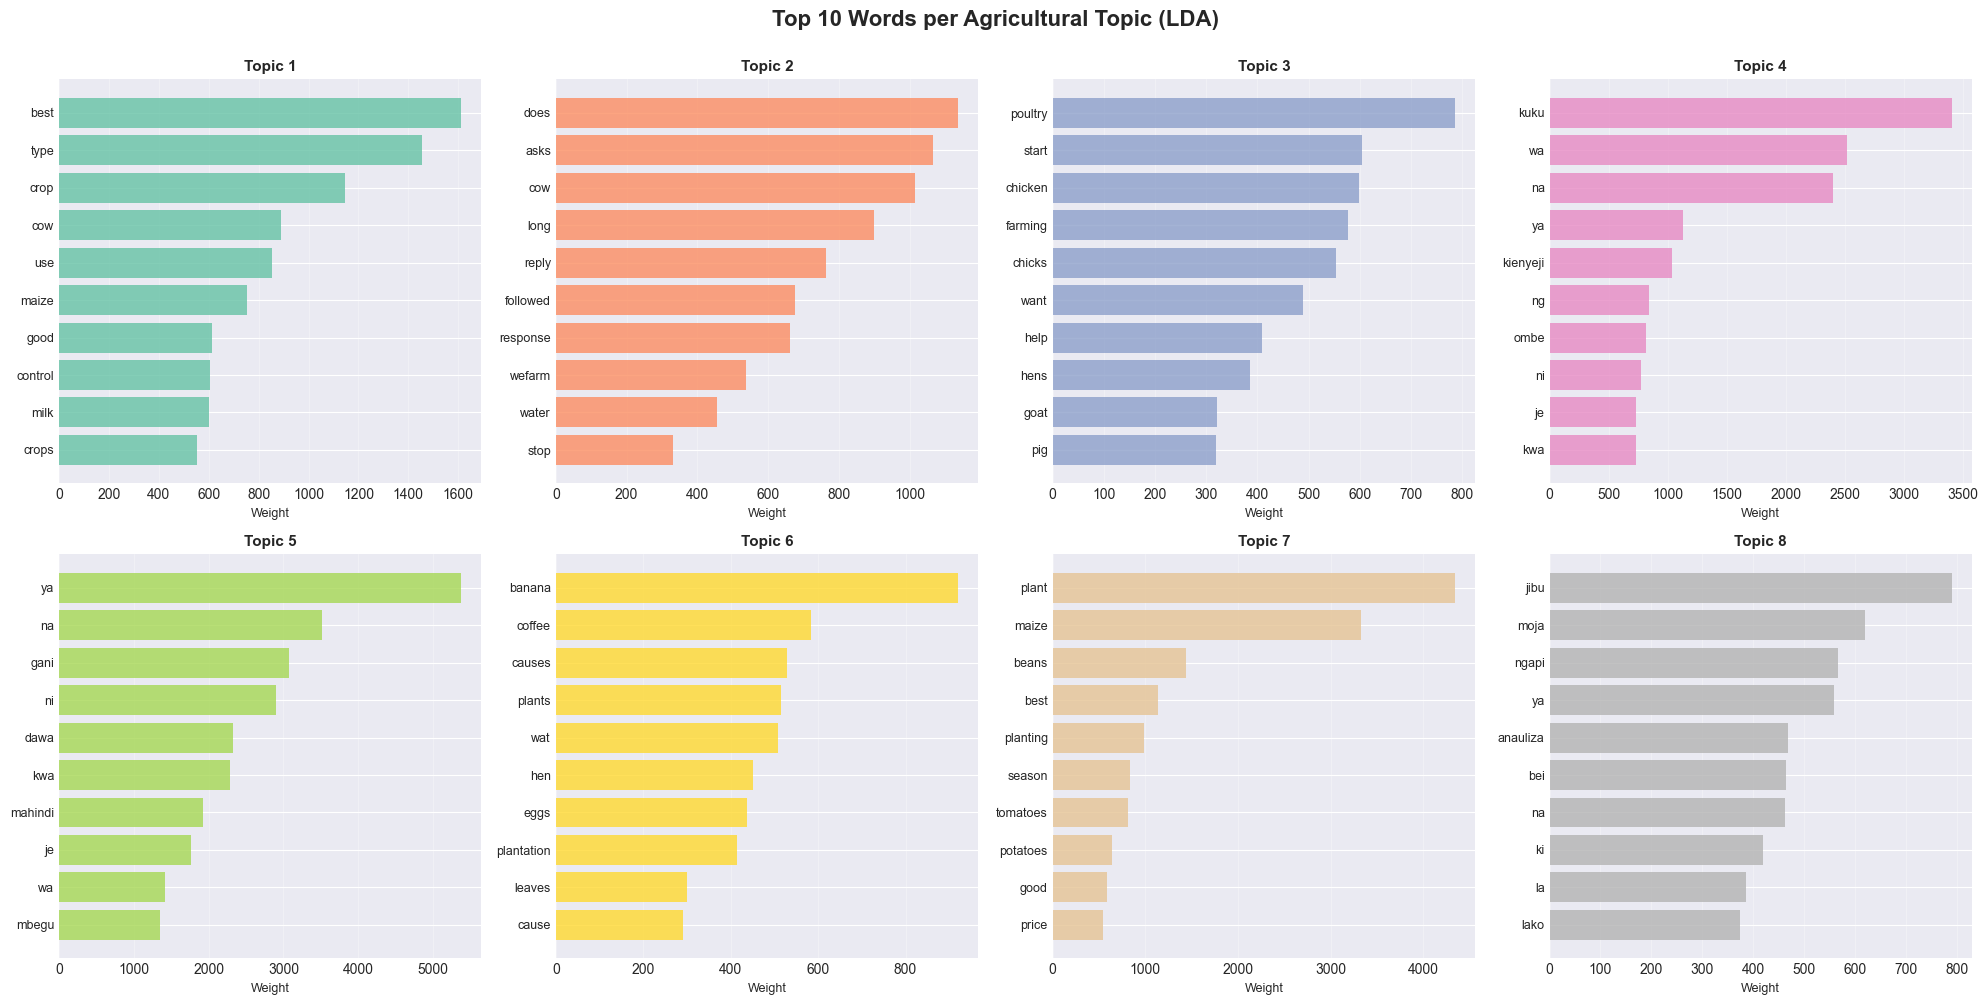


🎯 Discovered Topics:

Topic 1: best, type, crop, cow, use...

Topic 2: does, asks, cow, long, reply...

Topic 3: poultry, start, chicken, farming, chicks...

Topic 4: kuku, wa, na, ya, kienyeji...

Topic 5: ya, na, gani, ni, dawa...

Topic 6: banana, coffee, causes, plants, wat...

Topic 7: plant, maize, beans, best, planting...

Topic 8: jibu, moja, ngapi, ya, anauliza...


In [ ]:
# Sample data for topic modeling (use subset for performance)
sample_size = min(50000, len(data))
sample_data = data.sample(n=sample_size, random_state=42)

# Prepare text data
questions = sample_data['question_content'].fillna('').astype(str)

# Create document-term matrix
print("Creating document-term matrix...")
vectorizer = CountVectorizer(max_features=1000, min_df=5, max_df=0.7, stop_words='english')
doc_term_matrix = vectorizer.fit_transform(questions)

# Build LDA model
print("Training LDA model...")
n_topics = 8
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42, max_iter=20)
lda_output = lda_model.fit_transform(doc_term_matrix)

# Extract top words per topic
feature_names = vectorizer.get_feature_names_out()

def get_top_words(model, feature_names, n_words=10):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        top_indices = topic.argsort()[-n_words:][::-1]
        topics[f"Topic {topic_idx + 1}"] = [feature_names[i] for i in top_indices]
    return topics

topics = get_top_words(lda_model, feature_names, 10)

# Visualize topics
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

colors = sns.color_palette('Set2', n_topics)

for idx, (topic_name, words) in enumerate(topics.items()):
    # Get word weights
    topic_weights = lda_model.components_[idx]
    top_indices = topic_weights.argsort()[-10:][::-1]
    top_weights = topic_weights[top_indices]
    
    axes[idx].barh(range(10), top_weights, color=colors[idx], alpha=0.8)
    axes[idx].set_yticks(range(10))
    axes[idx].set_yticklabels(words, fontsize=9)
    axes[idx].set_xlabel('Weight', fontsize=9)
    axes[idx].set_title(topic_name, fontsize=11, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(alpha=0.3, axis='x')

plt.suptitle('Top 10 Words per Agricultural Topic (LDA)', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("\n🎯 Discovered Topics:")
for topic_name, words in topics.items():
    print(f"\n{topic_name}: {', '.join(words[:5])}...")

## 6. Key Insights and Recommendations

### 6.1 Weather-Question Correlation Insights

In [42]:
# Generate comprehensive insights
print("="*80)
print("🌾 KEY FINDINGS: WEATHER PATTERNS & AGRICULTURAL QUESTIONS")
print("="*80)

# 1. Seasonal patterns
seasonal_summary = data.groupby('season').agg({
    'question_id': 'count',
    'weather_category': lambda x: x.value_counts().index[0]
}).rename(columns={'question_id': 'total_questions', 'weather_category': 'dominant_category'})

print("\n1️⃣ SEASONAL PATTERNS:")
for season, row in seasonal_summary.iterrows():
    pct = (row['total_questions'] / len(data)) * 100
    print(f"   • {season}:")
    print(f"     - {row['total_questions']:,} questions ({pct:.1f}% of total)")
    print(f"     - Dominant category: {row['dominant_category']}")

# 2. Monthly trends
monthly_summary = data.groupby('month_name')['question_id'].count().reindex(
    ['January', 'February', 'March', 'April', 'May', 'June',
     'July', 'August', 'September', 'October', 'November', 'December']
)

print("\n2️⃣ MONTHLY TRENDS:")
print(f"   • Peak activity: {monthly_summary.idxmax()} ({monthly_summary.max():,} questions)")
print(f"   • Lowest activity: {monthly_summary.idxmin()} ({monthly_summary.min():,} questions)")
print(f"   • Average monthly questions: {monthly_summary.mean():.0f}")

# 3. Category insights
category_summary = data['weather_category'].value_counts()
print("\n3️⃣ QUESTION CATEGORY DISTRIBUTION:")
for cat, count in category_summary.items():
    pct = (count / len(data)) * 100
    print(f"   • {cat.capitalize()}: {count:,} ({pct:.1f}%)")



print("\n" + "="*80)
print("✓ Analysis Complete")
print("="*80)

🌾 KEY FINDINGS: WEATHER PATTERNS & AGRICULTURAL QUESTIONS

1️⃣ SEASONAL PATTERNS:
   • Dry Season:
     - 6,890,819 questions (33.9% of total)
     - Dominant category: other
   • Hot Dry Season:
     - 2,267,174 questions (11.2% of total)
     - Dominant category: other
   • Long Rains:
     - 4,939,572 questions (24.3% of total)
     - Dominant category: other
   • Short Rains:
     - 6,207,278 questions (30.6% of total)
     - Dominant category: other

2️⃣ MONTHLY TRENDS:
   • Peak activity: November (2,355,975 questions)
   • Lowest activity: February (1,099,469 questions)
   • Average monthly questions: 1692070

3️⃣ QUESTION CATEGORY DISTRIBUTION:
   • Other: 14,615,982 (72.0%)
   • Planting: 2,537,891 (12.5%)
   • Harvesting: 898,075 (4.4%)
   • Drought: 674,157 (3.3%)
   • Disease: 672,664 (3.3%)
   • Pest: 510,161 (2.5%)
   • Soil: 370,915 (1.8%)
   • Weather_damage: 24,998 (0.1%)

✓ Analysis Complete


### 7.2 Summary Dashboard Visualization

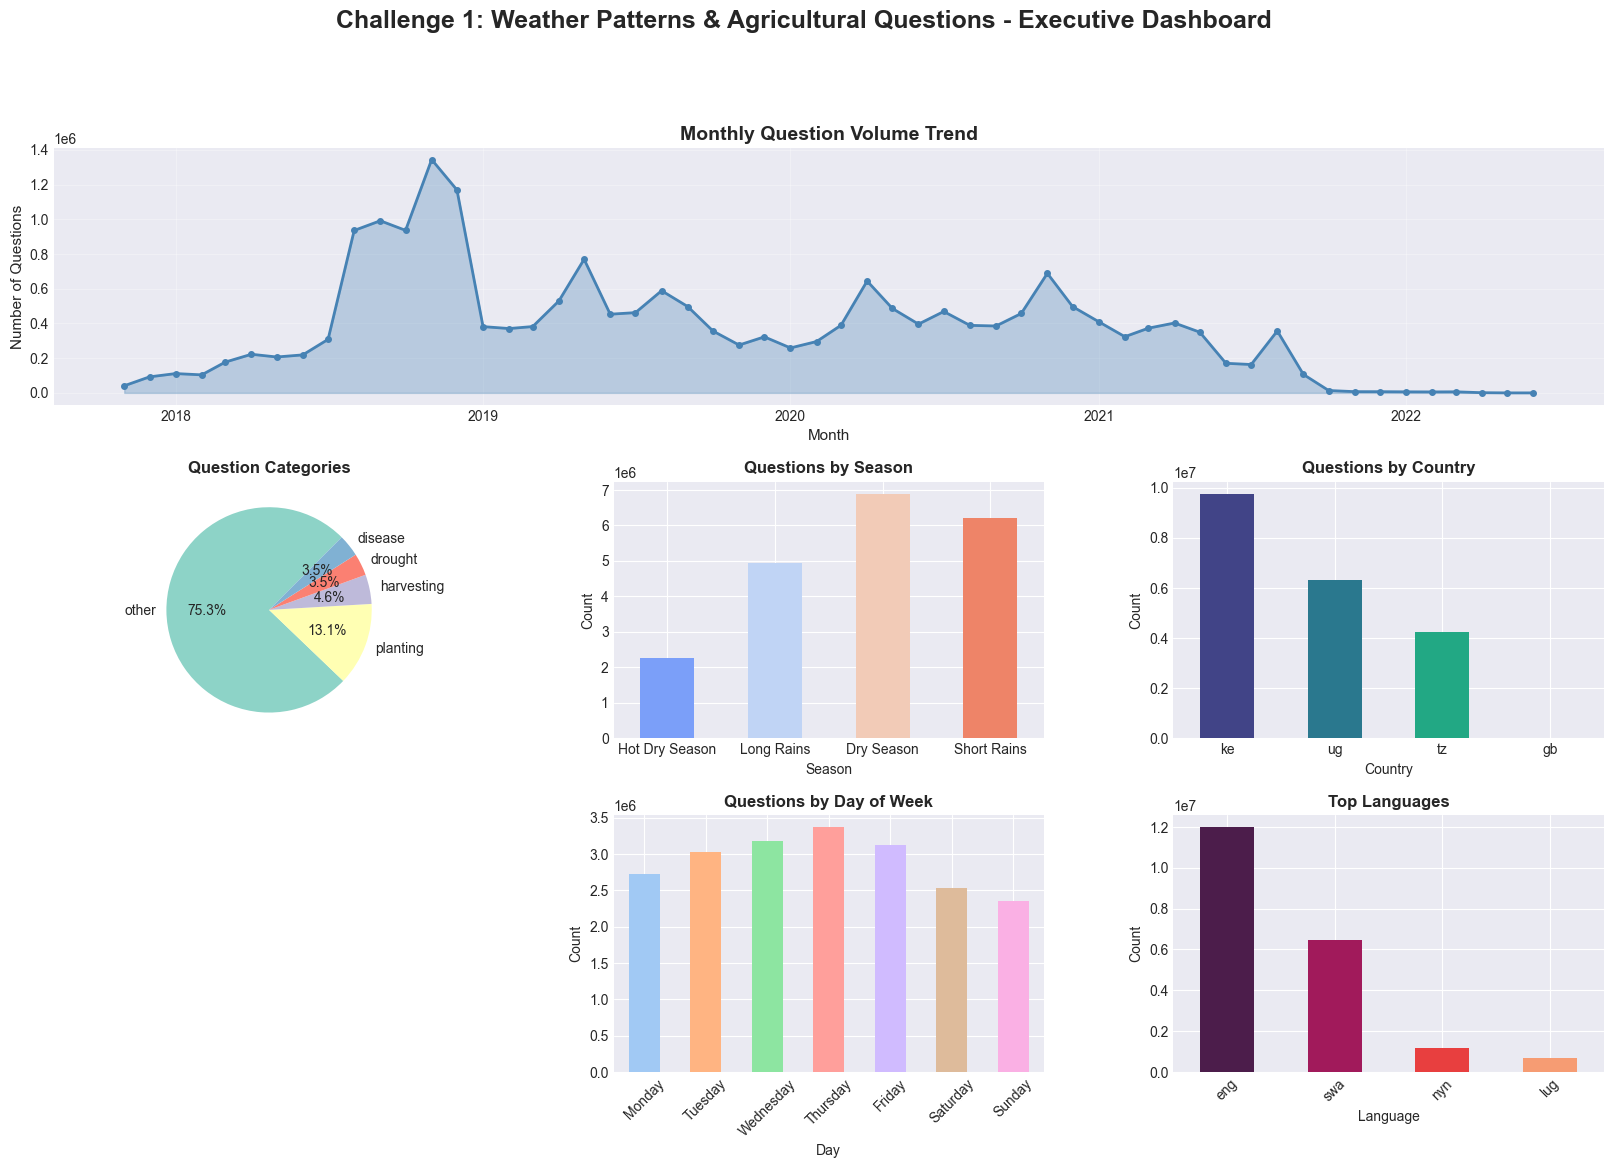

In [ ]:
# Create comprehensive summary dashboard
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Monthly trend
ax1 = fig.add_subplot(gs[0, :])
monthly_data = data.groupby(data['question_sent'].dt.to_period('M')).size()
monthly_data.index = monthly_data.index.to_timestamp()
ax1.plot(monthly_data.index, monthly_data.values, linewidth=2, color='steelblue', marker='o', markersize=4)
ax1.fill_between(monthly_data.index, monthly_data.values, alpha=0.3, color='steelblue')
ax1.set_title('Monthly Question Volume Trend', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=11)
ax1.set_ylabel('Number of Questions', fontsize=11)
ax1.grid(alpha=0.3)

# 2. Category distribution pie
ax2 = fig.add_subplot(gs[1, 0])
top_categories = category_summary.head(6)
colors_pie = sns.color_palette('Set3', len(top_categories))
ax2.pie(top_categories.values, labels=top_categories.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=45)
ax2.set_title('Question Categories', fontsize=12, fontweight='bold')

# 3. Seasonal distribution
ax3 = fig.add_subplot(gs[1, 1])
season_counts.plot(kind='bar', ax=ax3, color=sns.color_palette('coolwarm', len(season_counts)))
ax3.set_title('Questions by Season', fontsize=12, fontweight='bold')
ax3.set_xlabel('Season', fontsize=10)
ax3.set_ylabel('Count', fontsize=10)
ax3.tick_params(axis='x', rotation=0)

# 4. Country distribution
ax4 = fig.add_subplot(gs[1, 2])
country_counts = data['question_user_country_code'].value_counts()
country_counts.plot(kind='bar', ax=ax4, color=sns.color_palette('viridis', len(country_counts)))
ax4.set_title('Questions by Country', fontsize=12, fontweight='bold')
ax4.set_xlabel('Country', fontsize=10)
ax4.set_ylabel('Count', fontsize=10)
ax4.tick_params(axis='x', rotation=0)


# 5. Weekly pattern
ax6 = fig.add_subplot(gs[2, 1])
day_counts.plot(kind='bar', ax=ax6, color=sns.color_palette('pastel', len(day_counts)))
ax6.set_title('Questions by Day of Week', fontsize=12, fontweight='bold')
ax6.set_xlabel('Day', fontsize=10)
ax6.set_ylabel('Count', fontsize=10)
ax6.tick_params(axis='x', rotation=45)

# 6. Language distribution
ax7 = fig.add_subplot(gs[2, 2])
lang_counts = data['question_language'].value_counts().head(5)
lang_counts.plot(kind='bar', ax=ax7, color=sns.color_palette('rocket', len(lang_counts)))
ax7.set_title('Top Languages', fontsize=12, fontweight='bold')
ax7.set_xlabel('Language', fontsize=10)
ax7.set_ylabel('Count', fontsize=10)
ax7.tick_params(axis='x', rotation=45)

plt.suptitle('Challenge 1: Weather Patterns & Agricultural Questions - Executive Dashboard', 
             fontsize=18, fontweight='bold', y=0.995)
plt.show()